In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import matplotlib
import skimage

from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from dataclasses import dataclass

c:\Users\thegr\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [34]:
# %matplotlib qt

# cap_tracking = cv.VideoCapture(r"..\datasets\unzipped\endovis\Tracking_Robotic_Training\Training\Dataset2\Video.avi")
# cap_segmentation = cv.VideoCapture(r"..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset2\Segmentation.avi")
# tracking_data = open(r"..\datasets\unzipped\endovis\Tracking_Robotic_Training\Training\Dataset2\Pose.txt", "r")

# stop = False
    
# frame_number = 0

# pred = []
# actual = []

# dist = []
# eef_size = []

# # _, frame = cap_tracking.read()
# # if frame is not None:
# #     cv.imshow("Frame", frame)
# #     cv.waitKey(0)
# #     cv.destroyAllWindows()
# # cap_tracking.release()

# shaft_angle_ = []

# last_hough_lines = None
# while True:
#     ret_seg, frame_seg = cap_segmentation.read()
#     if frame_seg is None:
#         print("End of video, breaking")
#         break

#     frame_number += 1

#     gs = cv.cvtColor(frame_seg, code = cv.COLOR_BGR2GRAY)
#     im = gs

#     canny = cv.Canny(gs, 70, 160)
#     canny_copy = canny.copy()
#     canny_blur = cv.GaussianBlur(canny, (3, 3), 1.0)
    
#     canny_blur_copy = canny_blur.copy()
    
#     eef = cv.inRange(gs, 65, 115)
#     eef_size.append(np.average(eef) / 255.0)
    
#     shaft = cv.inRange(gs, 116, 165)
#     shaft_canny = cv.Canny(shaft, 70, 160)
    
#     # calculate moments of binary image
#     M_shaft = cv.moments(shaft)
    
#     # # calculate x,y coordinate of center
#     cX_shaft = int(M_shaft["m10"] / M_shaft["m00"])
#     cY_shaft = int(M_shaft["m01"] / M_shaft["m00"])
    
#     print(cX_shaft, cY_shaft)
    
#     _, frame_tracking = cap_tracking.read()
#     frame_seg_copy = frame_seg.copy()
        
#     # # put text and highlight the center
#     cv.circle(frame_seg_copy, (cX_shaft, cY_shaft), 10, (0, 255, 0), -1)
#     cv.circle(frame_tracking, (cX_shaft, cY_shaft), 10, (0, 255, 0), -1)
#     cv.circle(canny_blur_copy, (cX_shaft, cY_shaft), 10, 127, -1)
#     # cv.putText(frame_seg_copy, "Shaft", (cX_shaft, cY_shaft - 10), cv.FONT_HERSHEY_PLAIN, 2, (0, 255, 0))

#     # calculate moments of binary image
#     M_eef = cv.moments(eef)
    
#     # # calculate x,y coordinate of center
#     cX_eef = int(M_eef["m10"] / M_eef["m00"])
#     cY_eef = int(M_eef["m01"] / M_eef["m00"])
    
#     hough_lines = None
#     while hough_lines is None:
#         threshold = 300
#         hough_lines = cv.HoughLines(
#             image = shaft_canny,
#             rho = 10,
#             theta = np.radians(0.01),
#             threshold = threshold,
#         )
        
#         threshold -= 50
#         if threshold < 0: 
#             print(f"Fail: frame = {frame_number}")
#             hough_lines = last_hough_lines
        
#     last_hough_lines = hough_lines
#     shaft_angle = np.average(hough_lines[:,0,1]) + np.pi/2
#     shaft_angle_.append(shaft_angle)
    
    
#     shaft_to_eef_angle = np.arctan2(cY_shaft - cY_eef, cX_shaft - cX_eef) + np.pi - shaft_angle
#     alpha = np.pi/2 - shaft_to_eef_angle
#     dist = cv.norm(np.array((cX_eef, cY_eef)) - np.array((cX_shaft,cY_shaft)), cv.NORM_L2)
#     y_prime = dist*np.sin(shaft_to_eef_angle)
#     eef_to_control_pt = y_prime / np.sin(alpha)
    
#     cv.circle(frame_tracking, (cX_eef, cY_eef), 10, (0, 255, 0), -1)
#     # cv.circle(frame_tracking, (int(cX_eef - eef_to_control_pt*np.cos(-1 * (-alpha + shaft_angle + shaft_to_eef_angle))), int(cY_eef - eef_to_control_pt*np.sin(-1 * (-alpha + shaft_angle + shaft_to_eef_angle)))), 10, (255, 255, 255), -1)
#     cv.line(frame_tracking, (cX_shaft, cY_shaft), (int(cX_shaft + 100*np.cos(shaft_angle)), int(cY_shaft + 100*np.sin(shaft_angle))), color = (255, 255, 0), thickness = 3)
#     cv.line(frame_tracking, (cX_eef, cY_eef), (int(cX_eef + 100*np.cos(alpha)), int(cY_eef + 100*np.sin(alpha))), color = (255, 0, 255), thickness = 3)
#     # cv.imshow("Frame", frame_tracking)
#     # cv.waitKey(0)
#     # break

#     cv.circle(frame_seg_copy, (cX_eef, cY_eef), 10, (0, 255, 0), -1)
#     cv.circle(frame_tracking, (cX_eef, cY_eef), 10, (0, 255, 0), -1)
#     cv.circle(canny_blur_copy, (cX_eef, cY_eef), 10, 127, -1)

#     # cv.putText(frame_seg_copy, "End-effector", (cX_eef, cY_eef + 35), cv.FONT_HERSHEY_PLAIN, 2, (0, 255, 0))
    
#     cv.line(frame_seg_copy, (cX_eef, cY_eef), (cX_shaft, cY_shaft), color = (0, 255, 0), thickness = 3)
#     cv.line(frame_tracking, (cX_eef, cY_eef), (cX_shaft, cY_shaft), color = (0, 255, 0), thickness = 3)
#     cv.line(canny_blur_copy, (cX_eef, cY_eef), (cX_shaft, cY_shaft), color = 127, thickness = 3)
    
#     # cv.line(frame_seg_copy, (cX_shaft, cY_shaft), (int(cX_shaft + 100*np.cos(shaft_angle)), int(cY_shaft + 100*np.sin(shaft_angle))), color = (255, 255, 0), thickness = 3)
    
#     # cv.imshow("Frame", frame_seg_copy)
#     # cv.waitKey(0)
#     # cv.destroyAllWindows()
#     # break

    
#     vals = tracking_data.readline().split(" ")[:4]

#     # x, y = skimage.draw.line(cX_eef, cY_eef, cX_shaft, cY_shaft)
#     # found = False
#     # for i, j in zip(x, y):
#     #     if canny_blur[j,i] > 0: 
#     #         found = True
#     #         dist.append(cv.norm(np.array((cX_eef, cY_eef)) - np.array((i,j)), cv.NORM_L2))
#     #         break
    
#     # if not found:
#     #     i = j = -1
#     #     dist.append(-1)
#     #     cv.line(canny_blur, (cX_eef, cY_eef), (cX_shaft, cY_shaft), color = 255)
#     #     plt.imshow(canny_blur)
        
#     #     cv.waitKey(0)
#     # else:
#     #     pass
#     #     # cv.circle(canny_blur_copy, (i, j), 10, 255, -1)
#     #     # cv.circle(frame_tracking, (i, j), 10, (0, 0, 255), -1)
#     #     # cv.circle(frame_tracking, (int(vals[0]), int(vals[1])), 10, (255, 255, 0), -1)
#     #     # cv.imshow("Frame", frame_tracking)
#     #     # cv.waitKey(0)
#     #     # cv.destroyAllWindows()
#     #     # break

#     # vec = np.array([cX_shaft - cX_eef, -(cY_shaft - cY_eef)], dtype = np.float64)
#     # vec /= np.linalg.norm(vec)
#     # pred.append((i,j,-vec[0],vec[1]))
    
    
#     actual.append((int(vals[0]), int(vals[1]), float(vals[2]), float(vals[3])))

#     if frame_number % 100 == 0:
#         print(frame_number)

#     # cv.circle(frame_tracking, (i, j), 5, (255, 0, 0), -1)
#     # # 573 346
#     # cv.circle(frame_tracking, (521, 289), 5, (255, 255, 0), -1)

#     # put text and highlight the center



#     # # display the image
#     # cv.imshow("Image", frame_tracking)
#     # cv.waitKey(0)

# # plt.imshow(grad, cmap = "gray")
# # plt.colorbar()
# # # cv.imshow('Frame', np.concatenate((value, masked_img_gray[:,:,0]), axis = 1))

# # frame_number += 1

# # while True:
# #     # Exit if 'q' is pressed
# #     if cv.waitKey(1) & 0xFF == ord('q'):
# #         stop = True
# #         break
# #     elif cv.waitKey(1) == 32: 
# #         break
                                                                
# # cv.destroyAllWindows()
# # cap_segmentation.release()
# # cap_tracking.release()

516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116
516 116


KeyboardInterrupt: 

In [62]:
%matplotlib qt

cap_tracking = cv.VideoCapture(r"..\datasets\unzipped\endovis\Tracking_Robotic_Training\Training\Dataset3\Video.avi")
cap_segmentation = cv.VideoCapture(r"..\datasets\unzipped\endovis\Segmentation_Robotic_Training\Training\Dataset3\Segmentation.avi")
tracking_data = open(r"..\datasets\unzipped\endovis\Tracking_Robotic_Training\Training\Dataset2\Pose.txt", "r")

stop = False
    
frame_number = 0

pred = []
actual = []

dist = []
eef_size = []

# _, frame = cap_tracking.read()
# if frame is not None:
#     cv.imshow("Frame", frame)
#     cv.waitKey(0)
#     cv.destroyAllWindows()
# cap_tracking.release()

shaft_angle_ = []
pts = []

head_angle_pred = []
head_angle_actual = []

last_hough_lines = None
while True:
    ret_seg, frame_seg = cap_segmentation.read()
    ret_seg, frame_tracking = cap_tracking.read()
    if frame_seg is None:
        print("End of video, breaking")
        break

    frame_number += 1

    gs = cv.cvtColor(frame_seg, code = cv.COLOR_BGR2GRAY)
    tracked_gs = cv.cvtColor(frame_tracking, code = cv.COLOR_BGR2GRAY)

    canny = cv.Canny(gs, 70, 160)
    canny_blur_seg = cv.GaussianBlur(canny, (3, 3), 1.0)
    shaft = cv.inRange(gs, 116, 165)
    shaft_canny = cv.Canny(shaft, 70, 160)
    
    shaft_og = cv.bitwise_and(tracked_gs, tracked_gs, mask = shaft)
    shaft_og = cv.medianBlur(shaft_og, 5)
    shaft_canny_og = cv.Canny(shaft_og, 70, 160)
    canny_blur = cv.GaussianBlur(shaft_canny_og, (3, 3), 1.0)
    
    eef = cv.inRange(gs, 65, 115)
    eef_size.append(np.average(eef) / 255.0)
    
    # if frame_number == 250:
    #     cv.imshow("frame", shaft_canny_og)
    #     cv.waitKey(0)
    #     cv.destroyAllWindows()
    #     break
    
    # calculate moments of binary image
    M_shaft = cv.moments(shaft)
    
    # # calculate x,y coordinate of center
    cX_shaft = int(M_shaft["m10"] / M_shaft["m00"])
    cY_shaft = int(M_shaft["m01"] / M_shaft["m00"])
        
    # calculate moments of binary image
    M_eef = cv.moments(eef)
    
    # # calculate x,y coordinate of center
    cX_eef = int(M_eef["m10"] / M_eef["m00"])
    cY_eef = int(M_eef["m01"] / M_eef["m00"])
    
    hough_lines = None
    threshold = 255
    
    while hough_lines is None:
        hough_lines = cv.HoughLines(
            image = shaft_canny,
            rho = 10,
            theta = np.radians(0.1),
            threshold = threshold,
        )
        
        if hough_lines is None:
            if threshold < 50:        
                hough_lines = last_hough_lines
            else:
                threshold -= 25
        
    last_hough_lines = hough_lines
    shaft_angle = np.average(hough_lines[:,0,1]) + np.pi/2
    shaft_angle_.append(shaft_angle)
    
    # canny_copy = shaft_canny.copy()

    # for i in range(0, len(hough_lines)):
    #     rho = hough_lines[i][0][0]
    #     theta = hough_lines[i][0][1]
    #     a = np.cos(theta)
    #     b = np.sin(theta)
    #     x0 = a * rho
    #     y0 = b * rho
    #     pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    #     pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    #     cv.line(canny_copy, pt1, pt2, 50, 1, cv.LINE_AA)
        
    # rho = 100
    # theta = shaft_angle - np.pi/2
    # a = np.cos(theta)
    # b = np.sin(theta)
    # x0 = cX_shaft
    # y0 = cY_shaft
    # pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    # pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    # cv.line(canny_copy, pt1, pt2, 255, 1, cv.LINE_AA)
        
    # cv.imshow("Frame", shaft_canny_og)
    # cv.waitKey(0)
    # cv.destroyAllWindows()
    # break
        
    vals = tracking_data.readline().split(" ")[:6]

    found = False
    inc = 0.1
    i = cX_shaft
    j = cY_shaft
    
    pts_ = []
    
    while not (int(i) < canny_blur.shape[1] and int(i) >= 0) and (int(j) < canny_blur.shape[0] and int(j) >= 0):
        i += inc*np.cos(shaft_angle)
        j += inc*np.sin(shaft_angle)
    
    while (int(i) < canny_blur_seg.shape[1] and int(i) >= 0) and (int(j) < canny_blur_seg.shape[0] and int(j) >= 0):
        # print(int(i) < canny_blur.shape[0] and int(i) >= 0, int(j) < canny_blur.shape[1] and int(j) >= 0)
        pts_.append((int(i), int(j)))
        if canny_blur[int(j),int(i)] > 0: 
            found = True
            pts.append((int(i), int(j)))
            # dist.append(cv.norm(np.array((cX_eef, cY_eef)) - np.array((int(i),int(j))), cv.NORM_L2))
            break
        else:
            i += inc*np.cos(shaft_angle)
            j += inc*np.sin(shaft_angle)
            
    if not found:
        # for (x, y) in pts_:
        #     canny_blur = cv.circle(canny_blur, (x, y), 1, 255)
        shaft = cv.circle(shaft, (cX_shaft, cY_shaft), 1, 127)
        cv.imshow("Frame", shaft)
        cv.waitKey(0)
        cv.destroyAllWindows()
        break
    
    found = False
    inc = 0.1
    i = cX_shaft
    j = cY_shaft
            
    while not (int(i) < canny_blur_seg.shape[1] and int(i) >= 0) and (int(j) < canny_blur_seg.shape[0] and int(j) >= 0):
        i += inc*np.cos(shaft_angle)
        j += inc*np.sin(shaft_angle)
    
    while (int(i) < canny_blur_seg.shape[1] and int(i) >= 0) and (int(j) < canny_blur_seg.shape[0] and int(j) >= 0):
        if canny_blur_seg[int(j),int(i)] > 0: 
            found = True
            break
        else:
            i += inc*np.cos(shaft_angle)
            j += inc*np.sin(shaft_angle)
    
    if found:
        a = np.arctan2(pts[-1][1] - cY_eef, pts[-1][0] - cX_eef) + np.pi
        if a < 0.0: a += 2*np.pi
        head_angle_pred.append(a)
    else:
        head_angle_pred.append(head_angle_pred[-1]) # use last angle
    
    a = np.arctan2(float(vals[5]), float(vals[4]))
    if a < 0.0: a += 2*np.pi
    head_angle_actual.append(a)
    
    # if np.degrees(a) > 3.2:
    #     cv.line(frame_tracking, (cX_eef, cY_eef), (int(i), int(j)), (255, 255, 0), 5)
    #     cv.line(frame_tracking, (int(i), int(j)), (cX_shaft, cY_shaft), (255, 255, 0), 5)
    #     cv.circle(frame_tracking, (cX_shaft, cY_shaft), 10, (0, 255, 0), -1)
    #     cv.circle(frame_tracking, (cX_eef, cY_eef), 10, (0, 255, 0), -1)
    #     cv.circle(frame_tracking, (int(i), int(j)), 10, (0, 0, 255), -1)
        
    #     cv.imshow("Frame", frame_tracking)
    #     cv.waitKey(0)
    #     cv.destroyAllWindows()
    #     break
    
    # if abs(head_angle_pred[-1]) > 2.0:
    #     cv.circle(frame_tracking, (cX_eef, cY_eef), 5, (0, 255, 0)) 
    #     cv.circle(frame_tracking, (cX_shaft, cY_shaft), 5, (0, 255, 0)) 
    #     cv.circle(frame_tracking, (cX_eef, cY_eef), 5, (0, 255, 0)) 
    #     cv.circle(frame_tracking, pts[-1], 5, (255, 255, 255)) 
    #     cv.imshow("Frame", frame_tracking)
    #     cv.waitKey(0)
    #     cv.destroyAllWindows()
    #     break
        
    # if not found:
    #     i = j = -1
    #     dist.append(-1)
    #     cv.line(canny_blur, (cX_eef, cY_eef), (cX_shaft, cY_shaft), color = 255)
    #     plt.imshow(canny_blur)
        
    #     cv.waitKey(0)
    # else:
    #     pass
    #     # cv.circle(canny_blur_copy, (i, j), 10, 255, -1)
    #     # cv.circle(frame_tracking, (i, j), 10, (0, 0, 255), -1)
    #     # cv.circle(frame_tracking, (int(vals[0]), int(vals[1])), 10, (255, 255, 0), -1)
    #     # cv.imshow("Frame", frame_tracking)
    #     # cv.waitKey(0)
    #     # cv.destroyAllWindows()
    #     # break

    # vec = np.array([cX_shaft - cX_eef, -(cY_shaft - cY_eef)], dtype = np.float64)
    # vec /= np.linalg.norm(vec)
    # pred.append((i,j,-vec[0],vec[1]))
    
    
    actual.append((int(vals[0]), int(vals[1]), float(vals[2]), float(vals[3])))

    if frame_number % 100 == 0:
        print(frame_number)

    # cv.circle(frame_tracking, (i, j), 5, (255, 0, 0), -1)
    # # 573 346
    # cv.circle(frame_tracking, (521, 289), 5, (255, 255, 0), -1)

    # put text and highlight the center



    # # display the image
    # cv.imshow("Image", frame_tracking)
    # cv.waitKey(0)

# plt.imshow(grad, cmap = "gray")
# plt.colorbar()
# # cv.imshow('Frame', np.concatenate((value, masked_img_gray[:,:,0]), axis = 1))

# frame_number += 1

# while True:
#     # Exit if 'q' is pressed
#     if cv.waitKey(1) & 0xFF == ord('q'):
#         stop = True
#         break
#     elif cv.waitKey(1) == 32: 
#         break
                                                                
cv.destroyAllWindows()
cap_segmentation.release()
cap_tracking.release()

100
200
300
400
500
600
700
800
900
1000
1100
End of video, breaking


In [8]:
int(M_shaft["m10"] / M_shaft["m00"])

578

In [49]:
plt.figure()
plt.plot([np.degrees(y) if x[0] != -1 else np.nan for x, y in zip(actual, shaft_angle_)], label = "Predicted")
plt.plot([np.degrees(np.arctan2(x[3], x[2])) if x[0] != -1 else np.nan for x in actual], label = "Actual")
plt.ylabel("Shaft angle [deg]")
plt.grid()
plt.legend()

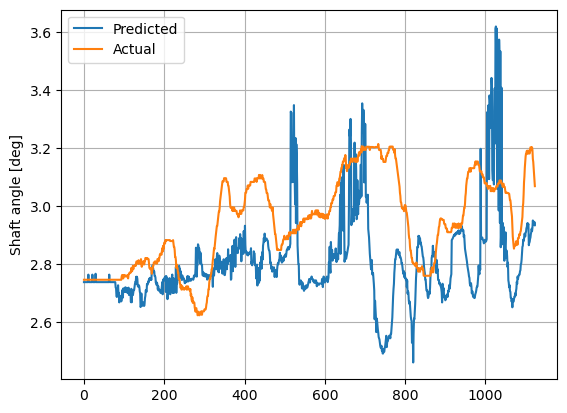

In [50]:
%matplotlib inline
plt.figure()
plt.plot(head_angle_pred, label = "Predicted")
plt.plot(head_angle_actual, label = "Actual")
plt.ylabel("Shaft angle [deg]")
plt.grid()
plt.legend()

In [53]:
np.average([a - b for a, b in zip(head_angle_actual, head_angle_pred)]), np.std([a - b for a, b in zip(head_angle_actual, head_angle_pred)])

(0.13601228078405356, 0.18703142761523184)

In [54]:
np.average([np.degrees(np.arctan2(x[3], x[2])) - np.degrees(y) for x, y in zip(actual, shaft_angle_) if x[0] != -1]),np.std([np.degrees(y) - np.degrees(np.arctan2(x[3], x[2])) for x, y in zip(actual, shaft_angle_) if x[0] != -1])

(1.0575097749644176, 4.331681260273632)

In [63]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot([x[0] if x[0] != -1 else np.nan for x in pred if x[0] != -1], [x[1] if x[1] != -1 else np.nan for x in pred if x[1] != -1])
# ax.plot([x[0] if x[0] != -1 else np.nan for x in actual if x[0] != -1], [x[1] if x[1] != -1 else np.nan for x in actual if x[1] != -1])
# ax.grid()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([x[0] if x[0] != -1 else np.nan for x in pts if x[0] != -1], [x[1] if x[1] != -1 else np.nan for x in pts if x[1] != -1])
ax.plot([x[0] if x[0] != -1 else np.nan for x in actual if x[0] != -1], [x[1] if x[1] != -1 else np.nan for x in actual if x[1] != -1])
ax.grid()

Text(0.5, 0, 'Frame index')

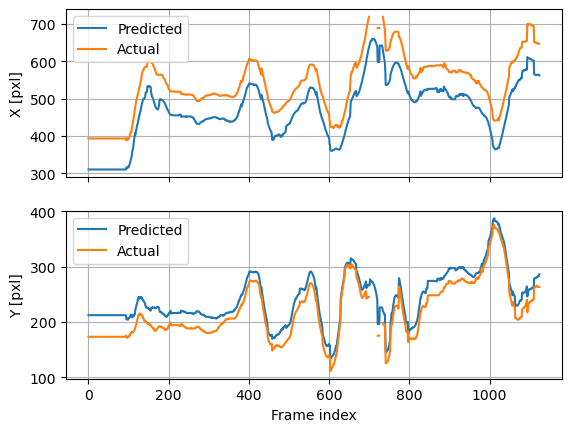

In [15]:
# %matplotlib inline
# fig, ax = plt.subplots(2, 1, sharex = True)
# for i in range(2):
#     ax[i].plot(np.arange(len(pred)), [x[i] if x[i] != -1 else np.nan for x in pred], label = "Predicted")
#     ax[i].plot(np.arange(len(pred)), [x[i] if x[i] != -1 else np.nan for x in actual], label = "Actual")
#     ax[i].set_ylabel("X [pxl]" if i == 0 else "Y [pxl]")
#     ax[i].legend()
#     ax[i].grid()
# ax[1].set_xlabel("Frame index")

Text(0.5, 0, 'Frame index')

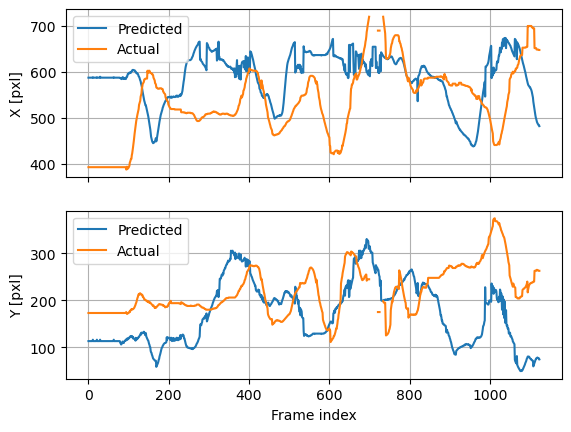

In [52]:
%matplotlib inline
fig, ax = plt.subplots(2, 1, sharex = True)
for i in range(2):
    ax[i].plot(np.arange(len(pts)), [x[i] if x[i] != -1 else np.nan for x in pts], label = "Predicted")
    ax[i].plot(np.arange(len(pts)), [x[i] if x[i] != -1 else np.nan for x in actual], label = "Actual")
    ax[i].set_ylabel("X [pxl]" if i == 0 else "Y [pxl]")
    ax[i].legend()
    ax[i].grid()
ax[1].set_xlabel("Frame index")

Text(0.02, 0.5, 'Error [pxl]')

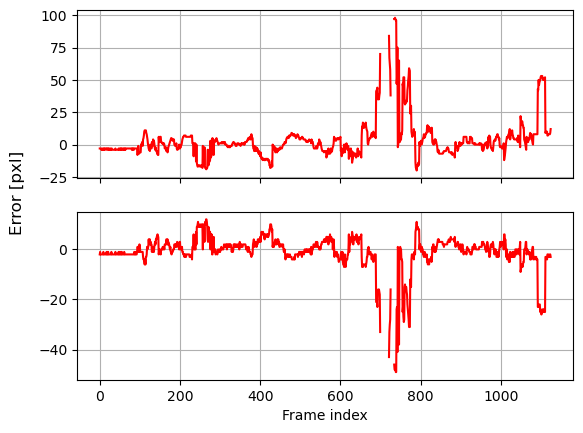

In [18]:
fig, ax = plt.subplots(2, 1, sharex = True)
for i in range(2):
    ax[i].plot(
        [y[i]-x[i] if x[i] != -1 and y[i] != -1 else np.nan for x, y in zip(pts, actual)], 
        label = "X" if i == 0 else "Y",
        color = "red"
    )
    
    ax[i].grid()

ax[1].set_xlabel("Frame index")
fig.supylabel("Error [pxl]")

In [26]:
np.average([y[0]-x[0] for x, y in zip(pts, actual) if x[0] != -1 and y[i] != -1]), np.std([y[0]-x[0] for x, y in zip(pts, actual) if x[0] != -1 and y[0] != -1])

(3.021897810218978, 14.627225467103106)

Text(0.02, 0.5, 'Error [pxl]')

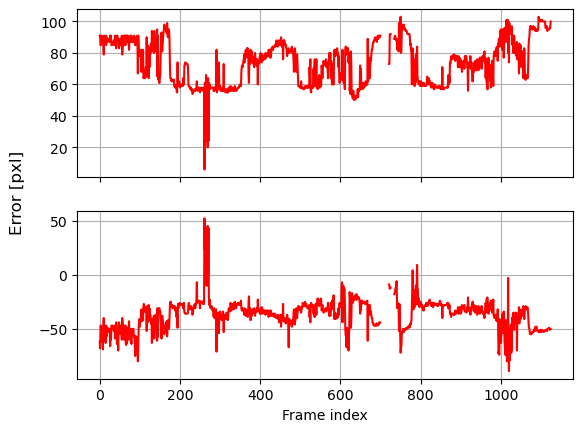

In [56]:
fig, ax = plt.subplots(2, 1, sharex = True)
for i in range(2):
    ax[i].plot(
        [y[i]-x[i] if x[i] != -1 and y[i] != -1 else np.nan for x, y in zip(pts, actual)], 
        label = "X" if i == 0 else "Y",
        color = "red"
    )
    
    ax[i].grid()

ax[1].set_xlabel("Frame index")
fig.supylabel("Error [pxl]")

1.103124

0.7071067811865476


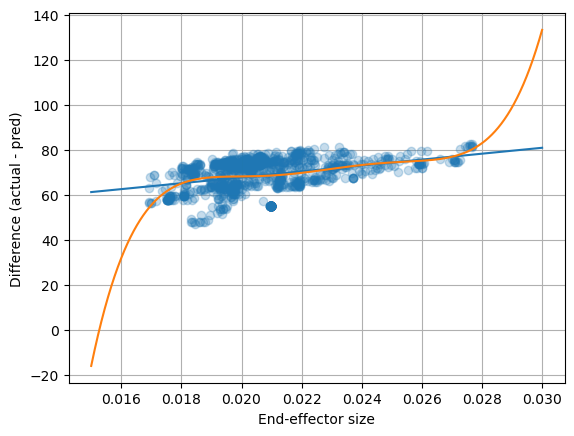

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

factor = np.cos if i == 0 else np.sin
ax.scatter(
    [e if x[i] != -1 and y[i] != -1 else np.nan for x, y, e in zip(pred, actual, eef_size)],
    [d if x[i] != -1 and y[i] != -1 else np.nan for x, y, d in zip(pred, actual, dist)], 
    # [factor(np.arctan2(y[3], y[2])) if x[i] != -1 and y[i] != -1 else np.nan for x, y in zip(pred, actual)],
    alpha = 0.25
)

print(factor(np.arctan2(y[3], y[2])))

fit = np.poly1d(
    np.polyfit(
        [e for x, y, e in zip(pred, actual, eef_size) if x[i] != -1 and y[i] != -1 ], 
        [d for x, y, d in zip(pred, actual, dist) if x[i] != -1 and y[i] != -1 ], 
        1
    )
)

fit5 = np.poly1d(
    np.polyfit(
        [e for x, y, e in zip(pred, actual, eef_size) if x[i] != -1 and y[i] != -1 ], 
        [d for x, y, d in zip(pred, actual, dist) if x[i] != -1 and y[i] != -1 ], 
        5
    )
)


ax.plot(np.linspace(0.015, 0.03, 5000), fit(np.linspace(0.015, 0.03, 5000)))
ax.plot(np.linspace(0.015, 0.03, 5000), fit5(np.linspace(0.015, 0.03, 5000)))

ax.set_xlabel("End-effector size")
ax.set_ylabel("Error [pxl]")

ax.set_axisbelow(True)
ax.grid()

Text(0.5, 0.01, 'Frame index')

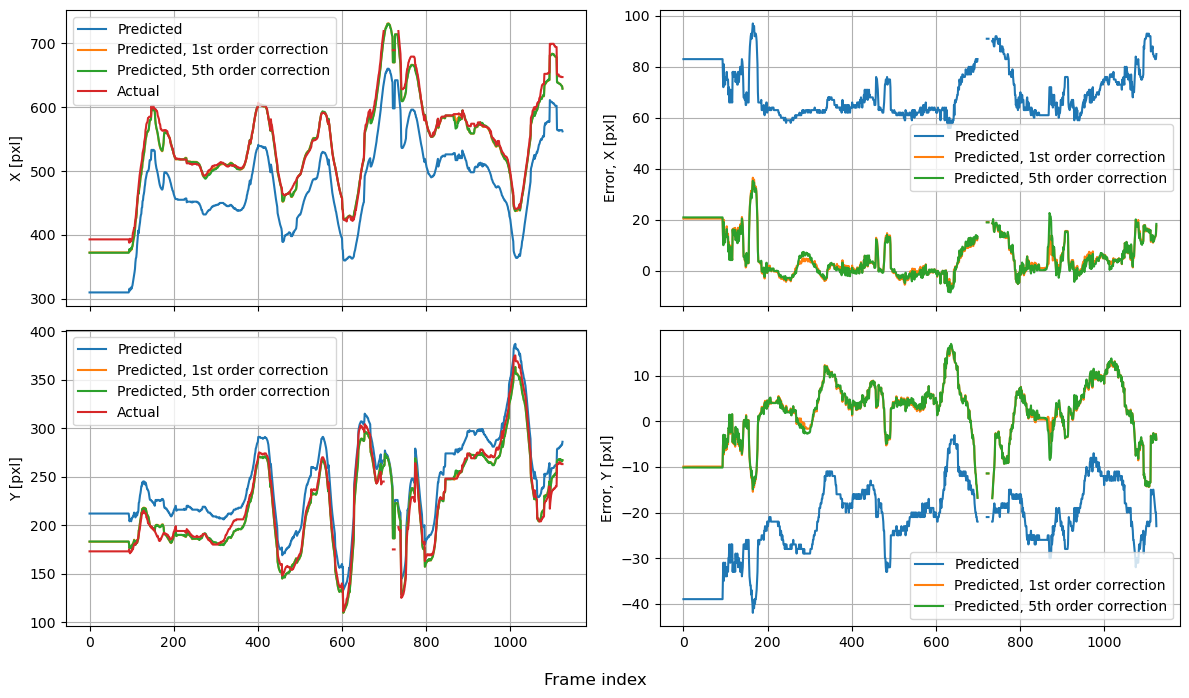

In [26]:
fig, ax = plt.subplots(2, 2, sharex = True, figsize = (12, 7), tight_layout = True)
for i in range(2):
    func = np.cos if i == 0 else np.sin
    ax[i, 0].plot(np.arange(len(pred)), [x[i] if x[i] != -1 else np.nan for x in pred], label = "Predicted")
    ax[i, 0].plot(np.arange(len(pred)), [x[i] - func(np.arctan2(x[3], x[2]))*fit(e) if x[i] != -1 else np.nan for x, e in zip(pred, eef_size)], label = "Predicted, 1st order correction")
    ax[i, 0].plot(np.arange(len(pred)), [x[i] - func(np.arctan2(x[3], x[2]))*fit5(e) if x[i] != -1 else np.nan for x, e in zip(pred, eef_size)], label = "Predicted, 5th order correction")
    ax[i, 0].plot(np.arange(len(pred)), [x[i] if x[i] != -1 else np.nan for x in actual], label = "Actual")
    
    ax[i, 1].plot(np.arange(len(pred)), [y[i]-x[i] if y[i] != -1 else np.nan for x, y in zip(pred, actual)], label = "Predicted")
    ax[i, 1].plot(np.arange(len(pred)), [y[i]-(x[i] - func(np.arctan2(x[3], x[2]))*fit(e)) if y[i] != -1 else np.nan for x, y, e in zip(pred, actual, eef_size)], label = "Predicted, 1st order correction")
    ax[i, 1].plot(np.arange(len(pred)), [y[i]-(x[i] - func(np.arctan2(x[3], x[2]))*fit5(e)) if y[i] != -1 else np.nan for x, y, e in zip(pred, actual, eef_size)], label = "Predicted, 5th order correction")

    ax[i, 0].legend()
    ax[i, 0].grid()
    
    ax[i, 1].legend()
    ax[i, 1].grid()
    
ax[0, 0].set_ylabel("X [pxl]")
ax[0, 1].set_ylabel("Error, X [pxl]")

ax[1, 0].set_ylabel("Y [pxl]")
ax[1, 1].set_ylabel("Error, Y [pxl]")

fig.supxlabel("Frame index")

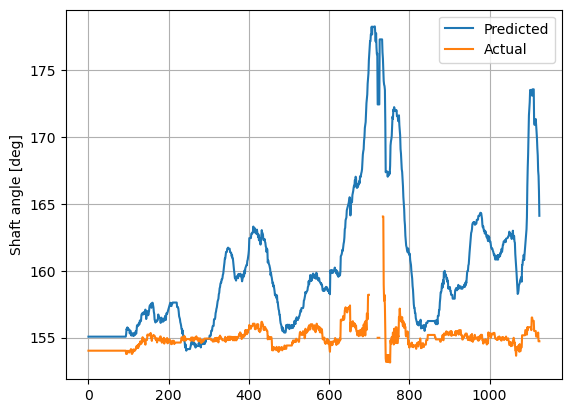

In [31]:
plt.figure()
plt.plot([np.degrees(np.arctan2(x[3], x[2])) if x[i] != -1 else np.nan for x in pred], label = "Predicted")
plt.plot([np.degrees(np.arctan2(x[3], x[2])) if x[i] != -1 else np.nan for x in actual], label = "Actual")
plt.ylabel("Shaft angle [deg]")
plt.grid()
plt.legend()

In [8]:
# cap = cv.VideoCapture(r"..\datasets\unzipped\endovis\Tracking_Robotic_Training\Training\Dataset4\Video.avi")

# # Feature parameters
# feature_params = {
#     "maxCorners": 100,
#     "qualityLevel": 0.3,
#     "minDistance": 7,
#     "blockSize": 7 
# }

# # Lucas Kinade parameters
# lk_params = {
#     "winSize": (25, 25),
#     "maxLevel": 4,
#     "criteria": (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03)
# }

# # Create some random colors
# color = np.random.randint(0,255,(100,3))

# # Take first frame and find corners in it
# ret, old_frame = cap.read()
# old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
# p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# # Create a mask image for drawing purposes
# mask = np.zeros_like(old_frame)

# # Initialize flag to end viewing when q is pressed
# stop = False

# frame_number = 0

# while (not stop):
#     ret,frame = cap.read()
#     if frame is None:
#         print("End of video, breaking")
#         break
    
#     frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

#     # calculate optical flow
#     p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

#     if p1 is None: 
#         print("Failed to extract features")
#         continue

#     # Select good points
#     good_new = p1[st==1]
#     good_old = p0[st==1]
    
#     try:
#         # Draw the tracks
#         for i,(new,old) in enumerate(zip(good_new,good_old)):
#             a,b = new.ravel()
#             c,d = old.ravel()
            
#             # Set values to integers to allow for drawing
#             a = int(a)
#             b = int(b)
#             c = int(c)
#             d = int(d)

#             mask = cv.line(mask, (a,b),(c,d), color[i].tolist(), 2)
#             frame = cv.circle(frame, (a,b), 5, color[i].tolist(), -1)
            
#         img = cv.add(frame,mask)
        
#         cv.imshow('Frame', img)
#         # cv.imwrite(os.path.join(PATH, f"vid_{ii}_{frame_number}.png"), img)
        
#         frame_number += 1
        
#         while True:
#             # Exit if 'q' is pressed
#             if cv.waitKey(25) & 0xFF == ord('q'):
#                 stop = True
#                 break
#             elif cv.waitKey(33) == 32: break
                                                                    
#         # Now update the previous frame and previous points
#         old_gray = frame_gray.copy()
#         p0 = good_new.reshape(-1,1,2)
#     except Exception as e:
#         print(f"Iteration failed: {e}")